In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
iris = datasets.load_iris() # 鸢尾花数据集
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=3, criterion="entropy")
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [4]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'white', 'red'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\dcdmm\AppData\Local\Temp\ipykernel_13920\151824744.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


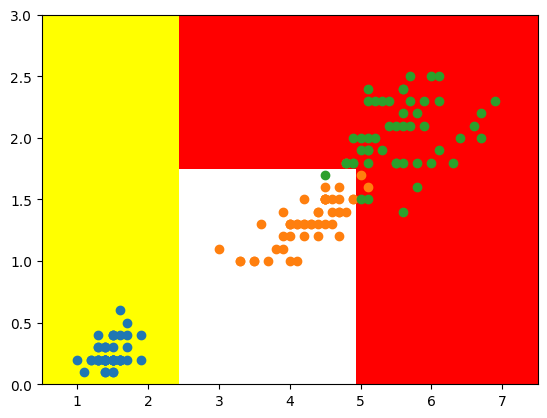

In [5]:
# ★★★★★局限一:决策边界与坐标轴平行,不能产生斜线或弯曲的曲线(多变量决策树可以产生斜线),决策边界可能不准确
plot_decision_boundary(tree_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [6]:
# 删除一条数据
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)

In [7]:
X_new.shape

(149, 2)

In [8]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
tree_clf2.fit(X_new, y_new)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

C:\Users\dcdmm\AppData\Local\Temp\ipykernel_13920\151824744.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


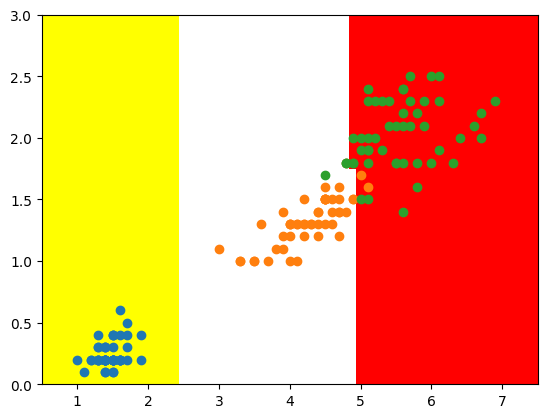

In [9]:
# ★★★★★局限二:决策树可能不稳定,数据中细微的变化可能会导致生成完全不同的树
# ★★★★★局限三:容易过拟合
# ★★★★★局限四:Decision tree learners create biased trees if some classes dominate.It is therefore recommended to balance the dataset prior to fitting with the decision tree)
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()